In [1]:
import math
import graphviz
import numpy as np
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt
from IPython.display import SVG
from sklearn.metrics import classification_report 


df = pd.read_excel('../data/hawaii-5-11-22.xls', sheet_name='Complete')

In [27]:
classes = ['ISLAND', 'VOLCANO', 'KEA LOA TREND']
class_index = 2
class_ident = classes[class_index]

primaries = df[[
    'LOCATION',
    class_ident,
    # Major Elements
    "SIO2(WT%)", 
    "AL2O3(WT%)",
    "TIO2(WT%)",
    "FeO*", 
    "CAO(WT%)", 
    "MGO(WT%)", 
    "K2O(WT%)", 
    "NA2O(WT%)",
    # Minor Elements
    # "P2O5(WT%)",
    # "MNO(WT%)", 
]]
primaries = primaries.dropna()

def build_classes(data):
    classes = { }
    for index, row in data.iterrows():
        loc = row['LOCATION'].split(' / ')
        number = row[class_ident]
        name = loc[class_index + 1] if (len(loc) > class_index + 1) else 'Unknown: ' + str(row[f'{class_ident}'])
        if number not in classes:
            classes[number] = [name]
        elif name not in classes[number]:
            classes[number].append(name)
    return classes


temp = build_classes(primaries[[class_ident, 'LOCATION']])
print(temp)

def get_names(row):
    loc = row['LOCATION'].split(' / ')
    if (len(loc) <= class_index + 1):
        return 'Unknown: ' + str(row[f'{class_ident}_ident'])
    return loc[class_index + 1]

primaries.rename(columns = {class_ident: f'{class_ident}_ident'}, inplace = True)
primaries[class_ident] = primaries.apply(lambda row: get_names(row), axis=1)
primaries = primaries.drop(columns=['LOCATION', f'{class_ident}_ident'])
print('Number of samples:', len(primaries.index))
display(primaries)

{1.0: ['HAWAII'], 3.0: ['KAHOOLAWE'], 7.0: ['KAUAI'], 9.0: ['KAULA'], 4.0: ['LANAI'], 2.0: ['MAUI'], 5.0: ['MOLOKAI'], 8.0: ['NIIHAU'], 6.0: ['OAHU']}
Number of samples: 2909


,SIO2(WT%),AL2O3(WT%),TIO2(WT%),FeO*,CAO(WT%),MGO(WT%),K2O(WT%),NA2O(WT%),ISLAND
0,49.09,9.79,1.68,10.855632,8.09,18.04,0.33,1.65,HAWAII
1,51.35,13.70,2.22,11.167376,10.52,6.46,0.62,2.46,HAWAII
2,51.40,13.86,2.22,10.962266,10.56,6.38,0.62,2.42,HAWAII
3,51.45,13.83,2.19,10.866694,10.58,6.50,0.57,2.46,HAWAII
4,51.00,14.15,2.19,10.571404,10.56,6.16,0.60,2.47,HAWAII
...,...,...,...,...,...,...,...,...,...
12765,66.78,15.69,0.59,2.704710,2.61,1.28,3.60,4.49,OAHU
12766,66.14,15.25,0.54,2.921724,2.82,1.66,3.66,4.47,OAHU
12767,66.53,15.25,0.56,2.882566,2.80,1.56,3.60,4.30,OAHU
12796,46.30,17.95,5.35,12.377758,8.17,3.67,0.89,3.92,OAHU


Classification: VOLCANO


C:\Users\miroi\AppData\Local\Temp\ipykernel_9364\2393741041.py:11: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  classifier.fit(data[0:][:train_size], shuffled[class_ident][:train_size])
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(

,precision,recall,f1-score,support
HUALALAI,0.56,0.58,0.57,31.0
KILAUEA,0.83,0.82,0.82,179.0
KOHALA,0.55,0.46,0.50,13.0
MAUNA KEA,0.68,0.80,0.73,65.0
Unknown: 5.0,0.00,0.00,0.00,3.0
MAUNA LOA,0.71,0.70,0.70,80.0
Unknown: 0.0,0.40,0.33,0.36,6.0
CALDERA-FILLING STAGE,0.00,0.00,0.00,0.0
POST-SHIELD STAGE,0.14,0.17,0.15,6.0
SHIELD STAGE,0.27,0.60,0.37,5.0


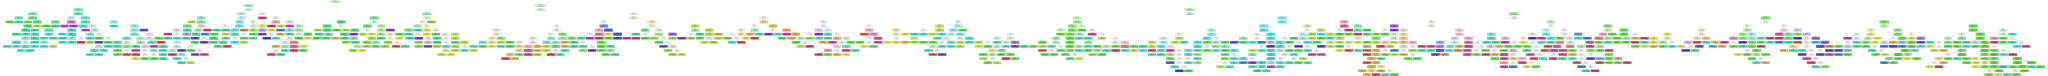

In [55]:
classifier = tree.DecisionTreeClassifier()
# shuffled = primaries.drop(['VOLCANO', 'ISLAND'], axis = 1).sample(frac=1)
shuffled = primaries.sample(frac = 1)

# Split data into training and test sets
train_size = math.floor(len(shuffled) * 0.8)
train = shuffled[:train_size]
test_count = len(shuffled) - train_size

data = shuffled.drop([class_ident], axis = 1)
classifier.fit(data[0:][:train_size], shuffled[class_ident][:train_size])

report = classification_report(
    shuffled[-test_count:][class_ident],
    classifier.predict(data[0:][-test_count:]),
    target_names = [str(x) for x in primaries[class_ident].unique()],
    labels=primaries[class_ident].unique(),
    output_dict=True
)

final = pd.DataFrame(report).transpose()
print(f'Classification: {class_ident}')
display(final.round(2))
final.round(2).to_csv(f'../trees/dt-{class_ident}.csv')

# plt.figure(figsize=(40,20))
# tree.plot_tree(classifier, fontsize=10)

dot_data = tree.export_graphviz(
    classifier, 
    out_file=None,
    feature_names=primaries.columns[1:],
    filled=True,
    rounded=True,
    class_names=[str(x) for x in primaries[class_ident].unique()],
)
graph = graphviz.Source(dot_data)
graph.format = 'svg'
graph.render(f'../trees/dt-{class_ident}', view=True)
graph
# SVG(graph.pipe(format='svg'))